In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm
import seaborn as sns
import network_tools as nt
import importlib
import networkx as nx
import dynamics as dyn
from scipy.linalg import eig
import csv
from sklearn.cluster import KMeans,MiniBatchKMeans
import statespacesplitting as sss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
importlib.reload(nt)
importlib.reload(dyn)
importlib.reload(sss)

<module 'statespacesplitting' from '/Users/ramon/Desktop/Year 2/hmm/statespacesplitting.py'>

In [100]:
N = 3
W = nt.generate_hierarchical_network(N,mu = 0.2,p0 = 1,recip = 50)

In [101]:
Theta = 1
gamma = 0.1
sigma = 0.05
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)

[ True  True  True]


In [102]:
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)
tau = 20
X_sampled = X[:,0::tau]
t_sampled= t[0::tau]

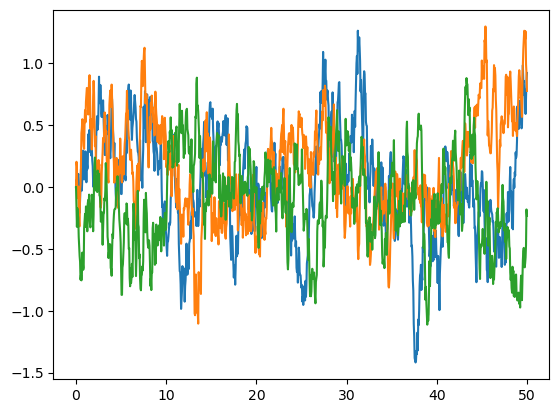

In [103]:
for i in range(0,3):
    plt.plot(t,X[i,:])

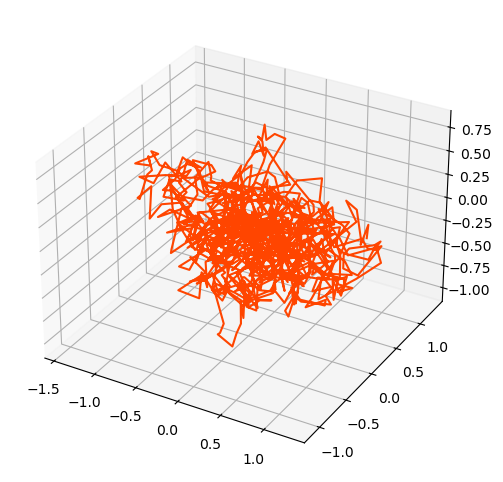

In [104]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') # Method 2
ax.plot(X[0,:], X[1,:], X[2,:], color = 'orangered')

plt.show()

/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


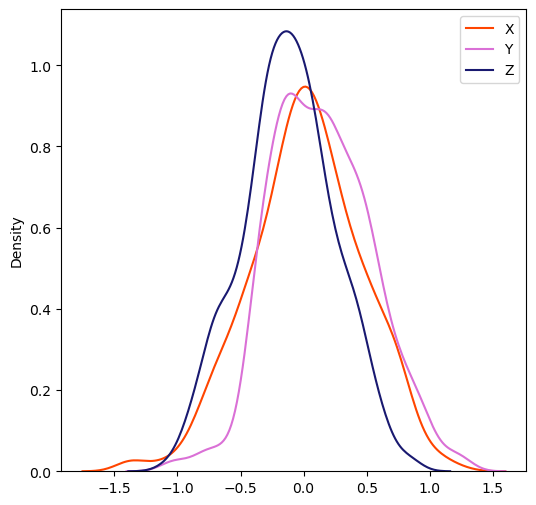

In [106]:
fig,ax  = plt.subplots(1)
fig.set_size_inches((6,6))
sns.kdeplot(X[0,:],label='X',color='orangered',ax=ax)
sns.kdeplot(X[1,:],label='Y',color='orchid',ax=ax)
sns.kdeplot(X[2,:],label='Z',color='midnightblue',ax=ax)

ax.legend()

In [10]:
X_mid = np.median(X[0,:])
X_list =[np.min(X[0,:]),X_mid,np.max(X[0,:])]
X_boundaries = [[np.min(X[0,:]),X_mid],[X_mid,np.max(X[0,:])]]
Y_mid = np.median(X[1,:])
Y_list =[np.min(X[1,:]),Y_mid,np.max(X[1,:])]
Y_boundaries = [[np.min(X[1,:]),Y_mid],[Y_mid,np.max(X[1,:])]]
Z_mid = np.median(X[2,:])
Z_list =[np.min(X[2,:]),Z_mid,np.max(X[2,:])]
Z_boundaries = [[np.min(X[2,:]),Z_mid],[Z_mid,np.max(X[2,:])]]

In [11]:
box_number = 2**3
boxes =[]
boxes_index =[]
for x in X_boundaries:
    for y in Y_boundaries:
        for z in Z_boundaries:
            boxes.append([x,y,z])
            boxes_index.append([X_boundaries.index(x),Y_boundaries.index(y),Z_boundaries.index(z)])

In [60]:
len(boxes)

8

In [12]:
box_timecourse =[]
for t in range(0,steps):
    placed = False
    for xi in range(0,len(X_list)):
        if X[0,t]<X_list[xi]:
            x_pos = xi-1
            break
    for xi in range(0,len(Y_list)):
        if X[1,t]<Y_list[xi]:
            y_pos = xi-1
            break
    for xi in range(0,len(Z_list)):
        if X[2,t]<Z_list[xi]:
            z_pos = xi-1
            break
    box_timecourse.append(boxes_index.index([x_pos,y_pos,z_pos]))

In [14]:
JTP = dyn.markov_chain_to_JTP(box_timecourse,8)
Phi = dyn.EPR_markov_chain_joint_JSD(JTP)

In [5]:
importlib.reload(sss)

<module 'statespacesplitting' from '/home/nartallokalu/Desktop/hmm/statespacesplitting.py'>

In [117]:
box_tc, box_idx_tc = sss.state_space_split(X,3,[X_list,Y_list,Z_list])

In [118]:
box_idx_tc

[2,
 1,
 2,
 4,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 6,
 6,
 6,
 6,
 1,
 1,
 6,
 1,
 6,
 6,
 6,
 6,
 1,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 5,
 5,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 5,
 5,
 0,
 5,
 7,
 7,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [140]:
bidx = np.array(box_idx_tc)
np.where(bidx==0)[0]

array([212, 224, 276, 277, 278, 279, 280, 301, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 319, 325, 326,
       329, 330, 371, 372, 375, 377, 381, 382, 577, 578, 579, 580, 584,
       597, 598, 603, 605, 606, 607, 608, 609, 610, 627, 628, 629, 642,
       697, 731, 816, 817, 818, 819, 820])

In [136]:
mask

array([False, False, False, ..., False, False, False])

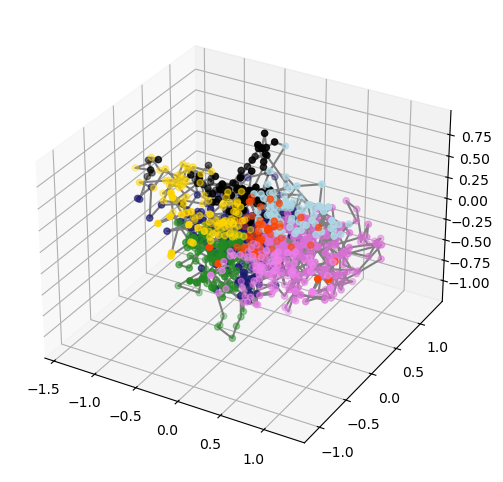

In [147]:
colours =['orangered','orchid','midnightblue','forestgreen','violet','gold','lightblue','black']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') # Method 2
bidx = np.array(box_idx_tc)
for i in range(0,8):
    ax.scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = colours[i])
ax.plot(X[0,], X[1,], X[2,], color = 'grey')
plt.show()

In [97]:
EPR_true = []
trials = 50
eps_N = 100
EPR_sss =np.zeros((trials,eps_N))
EPR_sss_JSD =np.zeros((trials,eps_N))
K=4
eps_range = np.linspace(0,1,eps_N)

for eps_i in range(0,eps_N):
    eps = eps_range[eps_i]
    W_hat = nt.parameterise_network(W,eps)
    Phi = dyn.EPR_network_ornstein_uhlenbeck(W_hat,sigma,Theta,gamma)
    EPR_true.append(Phi)
    for trial in range(0,trials):
        [X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,eps),sigma,Theta,gamma,dt,steps=6000)
        X_mid = np.median(X[0,:])
        X_list =[np.min(X[0,:]),X_mid,np.max(X[0,:])]
        Y_mid = np.median(X[1,:])
        Y_list =[np.min(X[1,:]),Y_mid,np.max(X[1,:])]
        Z_mid = np.median(X[2,:])
        Z_list =[np.min(X[2,:]),Z_mid,np.max(X[2,:])]
        A_mid = np.median(X[3,:])
        A_list =[np.min(X[3,:]),Z_mid,np.max(X[3,:])]
        [btc,b_idx_tc] = sss.state_space_split(X,4,[X_list,Y_list,Z_list,A_list])
        JTP = dyn.markov_chain_to_JTP(b_idx_tc,N=16)
        EPR_sss[trial,eps_i]= dyn.EPR_markov_chain_joint(JTP)
        EPR_sss_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(JTP)
#EPR_sss = pd.DataFrame(EPR_sss)
#EPR_sss.to_csv('EPRsss.csv',index=False)
EPR_true = pd.DataFrame(EPR_true)
#EPR_true.to_csv('EPR_true.csv',index=False)
EPR_sss_JSD = pd.DataFrame(EPR_sss_JSD)
#EPR_sss_JSD.to_csv('EPR_sss_JSD.csv',index=False)

Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges
Error: EPR diverges


KeyboardInterrupt: 

# PCA in highdimensional systems

In [82]:
N = 10
W = nt.generate_hierarchical_network(N,mu = 0.5,p0 = 1,recip = 10)
Theta = 1
gamma = 0.1
sigma = 0.01
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)
sc = StandardScaler()
X_std = sc.fit_transform(np.transpose(X))

[ True  True  True  True  True  True  True  True  True  True]


In [83]:
X_std.shape

(1001, 10)

In [86]:
pca = PCA(n_components=3)
X_pca = pca.fit(X_std)
X_pca = pca.transform(X_std)

Text(0, 0.5, 'cumulative explained variance')

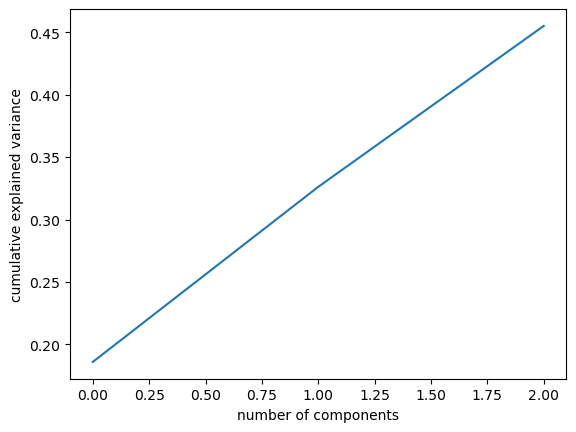

In [87]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [88]:
X_pca.shape
X_pca = np.transpose(X_pca)

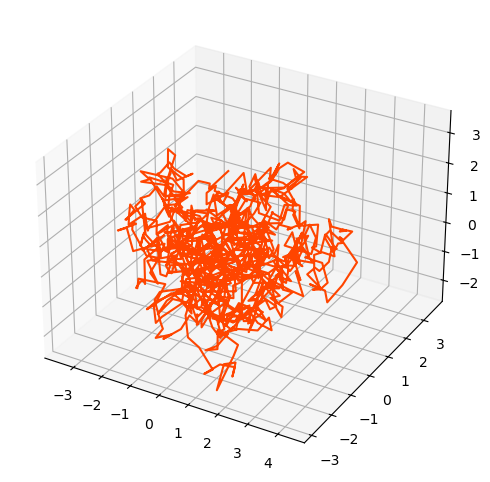

In [89]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') # Method 2
ax.plot(X_pca[0,:], X_pca[1,:], X_pca[2,:], color = 'orangered')

plt.show()